## Student Performance Indicator

#### Life cycle of Machine learning Project
- Understanding the Problem statement.
- Data Collection.
- Data Checks to perform.
- Exploratory Data Analysis.
- Data Pre-Processing.
- Model Training.
- Choose best Model.


### 1) Problem Statement aka Dikkat.
- This Project understand how the student's performance (test scores) is affected by other variables such as Gender, Parental level of Education,Ethinicity, Lunch and Test Prep. Course.
### 2) Data Collection.
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.


### 2.1 Importing Data and Required Package.
#### importing Pandas, Numpy, Seaborn, Matplotlib and Warning Library.

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/stud.csv')

#### Show 5 Records.

In [4]:
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
162,male,group B,master's degree,free/reduced,none,49,53,52
996,male,group C,high school,free/reduced,none,62,55,55
878,female,group D,some high school,standard,none,59,72,80
187,male,group D,some high school,standard,completed,62,66,68
425,female,group C,some college,free/reduced,none,62,67,62


#### Shape of the dataset

In [5]:
print(df.shape)

(1000, 8)


### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There is No Missing Value in Dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### some are object and some are int64

In [8]:
df.duplicated().sum()

0

#### There is No Duplicate Value in Data.

In [9]:
for col in df.columns:
    print(f"column name : {col}")
    print(df[col].value_counts())
    print("="*40)
    

column name : gender
gender
female    518
male      482
Name: count, dtype: int64
column name : race_ethnicity
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
column name : parental_level_of_education
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
column name : lunch
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
column name : test_preparation_course
test_preparation_course
none         642
completed    358
Name: count, dtype: int64
column name : math_score
math_score
65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: count, Length: 81, dtype: int64
column name : reading_score
reading_score
72    34
74    33
64    32
67    30
73    30
      ..
28     1
26     1
17     1
32     1
40

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [12]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'object']
print("We Have {} Numerical Features : {}".format(len(numerical_feature),numerical_feature))
print("We Have {} Categorical Features : {}".format(len(categorical_feature),categorical_feature))


We Have 3 Numerical Features : ['math_score', 'reading_score', 'writing_score']
We Have 5 Categorical Features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
for key in categorical_feature:
    print(f"{key} : {df[key].unique()}")

gender : ['female' 'male']
race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch : ['standard' 'free/reduced']
test_preparation_course : ['none' 'completed']


### 3.8 Adding columns for "Total Score" and "Average"

In [14]:
df['Total Score'] = df['math_score']+df['reading_score']+df['writing_score']
df['Average Score'] = df['Total Score']/3

In [15]:
### Ckecking Full Marks.
math_full = df[df['math_score']==100]['Average Score'].count()
reading_full = df[df['reading_score']==100]['Average Score'].count()
writing_full = df[df['writing_score']==100]['Average Score'].count()

print(f'Number of Students Having Full Marks in Maths :{math_full}')
print(f'Number of Students Having Full Marks in Reading :{reading_full}')
print(f'Number of Students Having Full Marks in Writing :{writing_full}')

Number of Students Having Full Marks in Maths :7
Number of Students Having Full Marks in Reading :17
Number of Students Having Full Marks in Writing :14


In [16]:
math_l20 = df[df['math_score']<=20]['Average Score'].count()
reading_l20 = df[df['reading_score']<=20]['Average Score'].count()
writing_l20 = df[df['writing_score']<=20]['Average Score'].count()

print(f'Number of Students Having having less Than 20 Marks in Maths :{math_l20}')
print(f'Number of Students Having having less Than 20 Marks in Reading :{reading_l20}')
print(f'Number of Students Having having less Than 20 Marks in Writing :{writing_l20}')

Number of Students Having having less Than 20 Marks in Maths :4
Number of Students Having having less Than 20 Marks in Reading :1
Number of Students Having having less Than 20 Marks in Writing :3


#### Poor Performance in Maths and best in Reading

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

<Axes: xlabel='Average Score', ylabel='Count'>

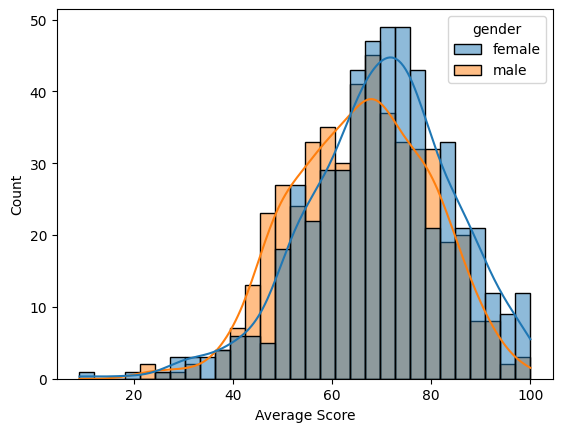

In [17]:
sns.histplot(data=df,x='Average Score',bins=30,kde=True,hue='gender')

#####  Insights
- Female students tend to perform well then male students.

<Axes: xlabel='Total Score', ylabel='Count'>

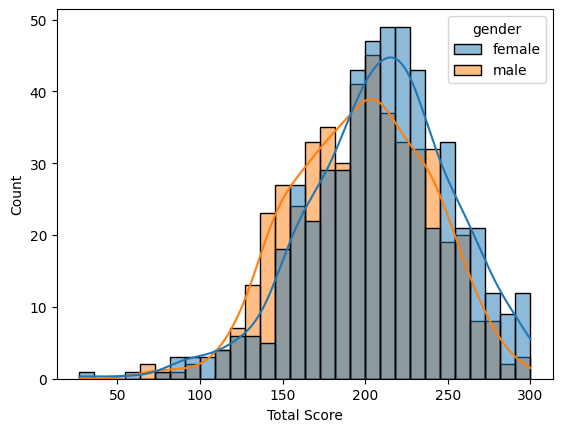

In [18]:
sns.histplot(data=df,x='Total Score',bins=30,kde=True,hue='gender')

<Axes: xlabel='Average Score', ylabel='Count'>

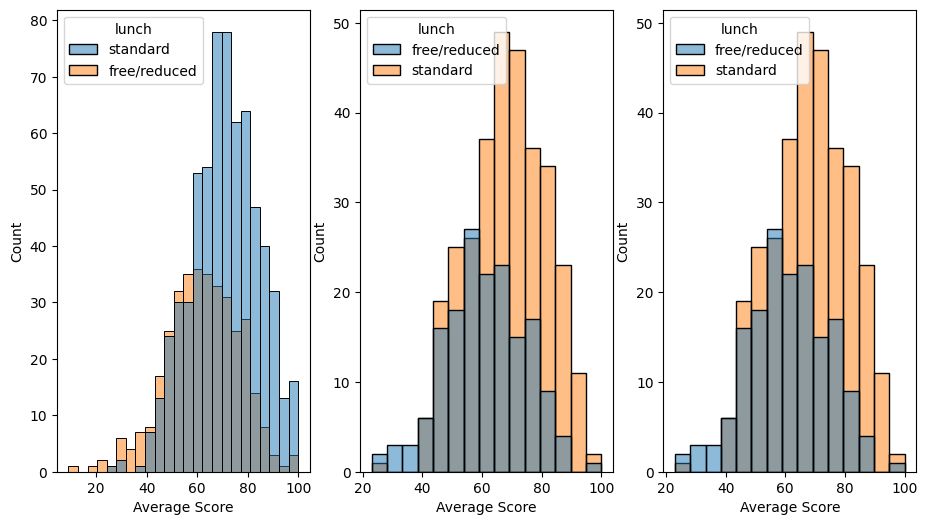

In [25]:
plt.subplots(1,3,figsize=(15,6))
plt.subplot(141)
sns.histplot(data=df,x='Average Score',hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'],x='Average Score',hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='Average Score',hue='lunch')

Standard Lunch Helps to perform well in Exam (be it both male and Female)

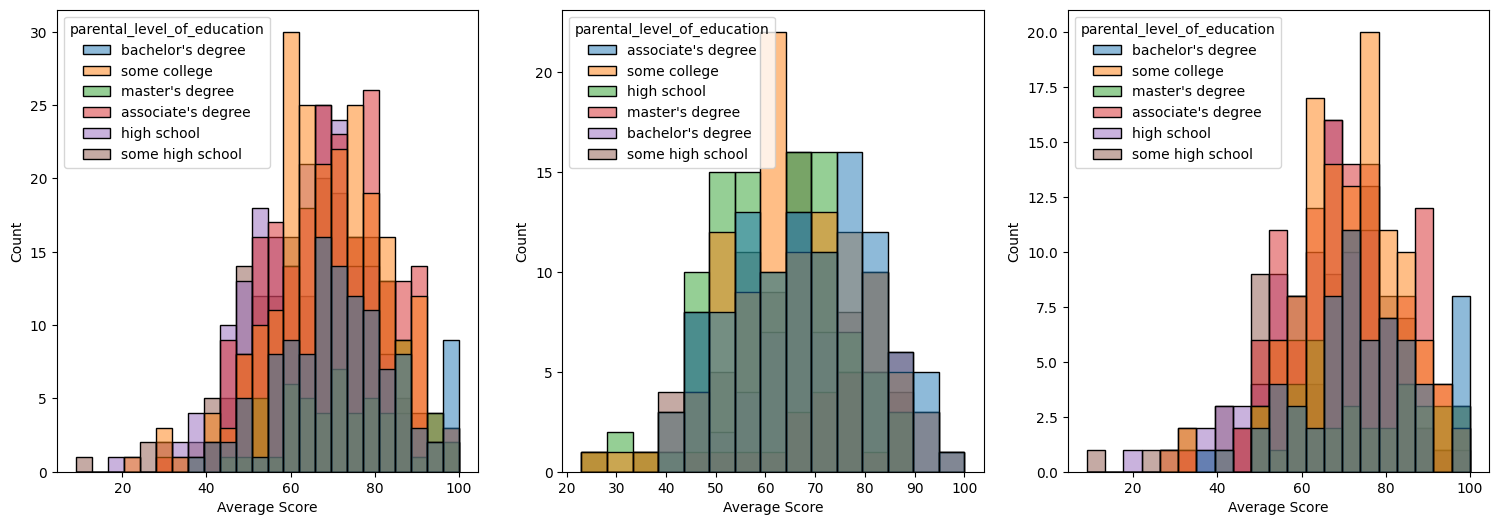

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average Score',hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average Score',hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average Score',hue='parental_level_of_education')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

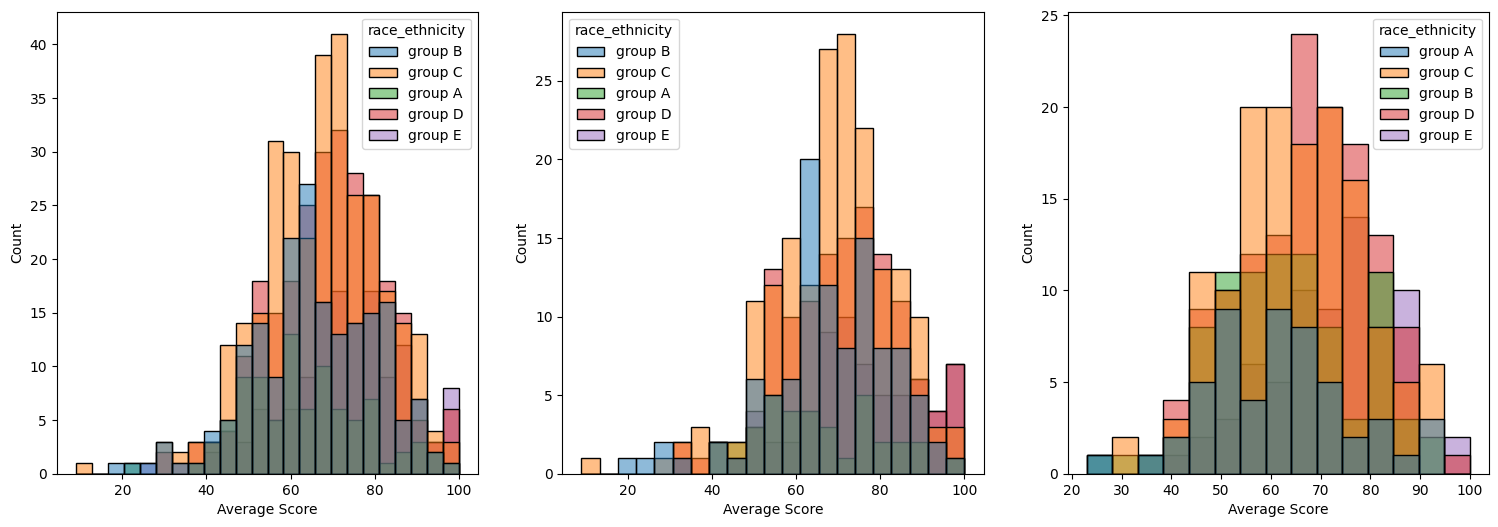

In [33]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average Score',hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average Score',hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average Score',hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

<Axes: title={'center': 'WRITING SCORES'}, ylabel='writing_score'>

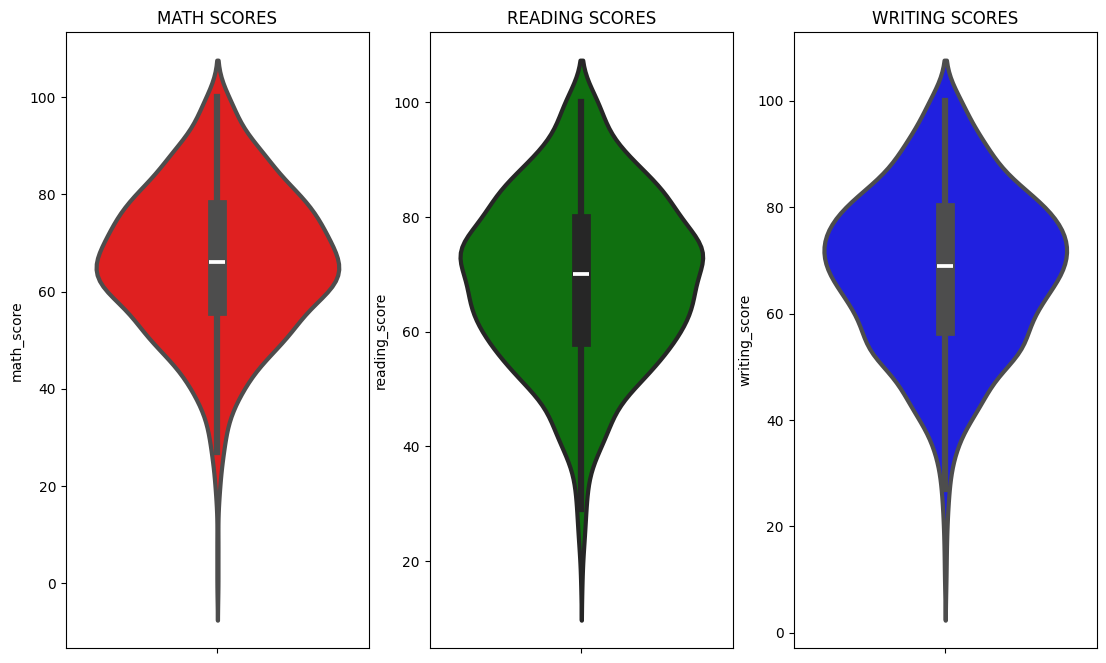

In [37]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

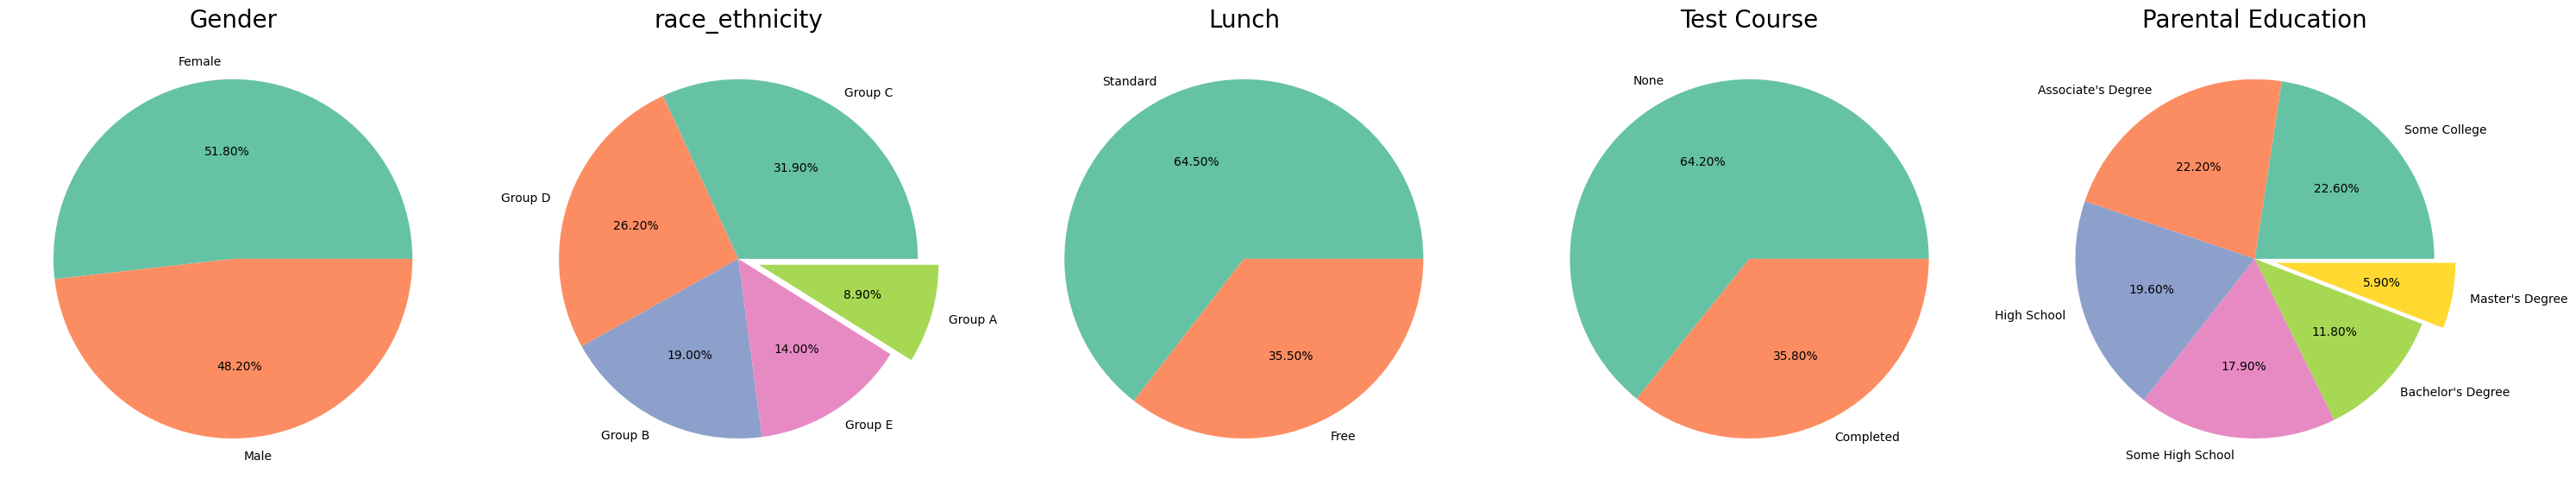

In [56]:
plt.figure(figsize=(30,12))

# Male/Female
plt.subplot(1,5,1)
plt.pie(df['gender'].value_counts(),labels=['Female','Male'],autopct='%.2f%%',colors=sns.color_palette('Set2'))
plt.title('Gender',fontsize=20)
plt.axis('off')


# race_ethinicity
plt.subplot(1,5,2)
plt.pie(df['race_ethnicity'].value_counts(),labels=['Group C', 'Group D','Group B','Group E','Group A'],autopct='%.2f%%',colors=sns.color_palette('Set2'),explode=[0, 0, 0, 0, 0.12])
plt.title('race_ethnicity',fontsize=20)
plt.axis('off')


# lunch
plt.subplot(1,5,3)
plt.pie(df['lunch'].value_counts(),labels=['Standard', 'Free'],autopct='%.2f%%',colors=sns.color_palette('Set2'),)
plt.title('Lunch',fontsize=20)
plt.axis('off')

# Test Course
plt.subplot(1,5,4)
plt.pie(df['test_preparation_course'].value_counts(),labels=['None', 'Completed'],autopct='%.2f%%',colors=sns.color_palette('Set2'),)
plt.title('Test Course',fontsize=20)
plt.axis('off')

# Education Level
plt.subplot(1,5,5)
plt.pie(df['parental_level_of_education'].value_counts(),labels=['Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"],autopct='%.2f%%',colors=sns.color_palette('Set2'),explode=[0,0,0,0,0,0.12])
plt.title('Parental Education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

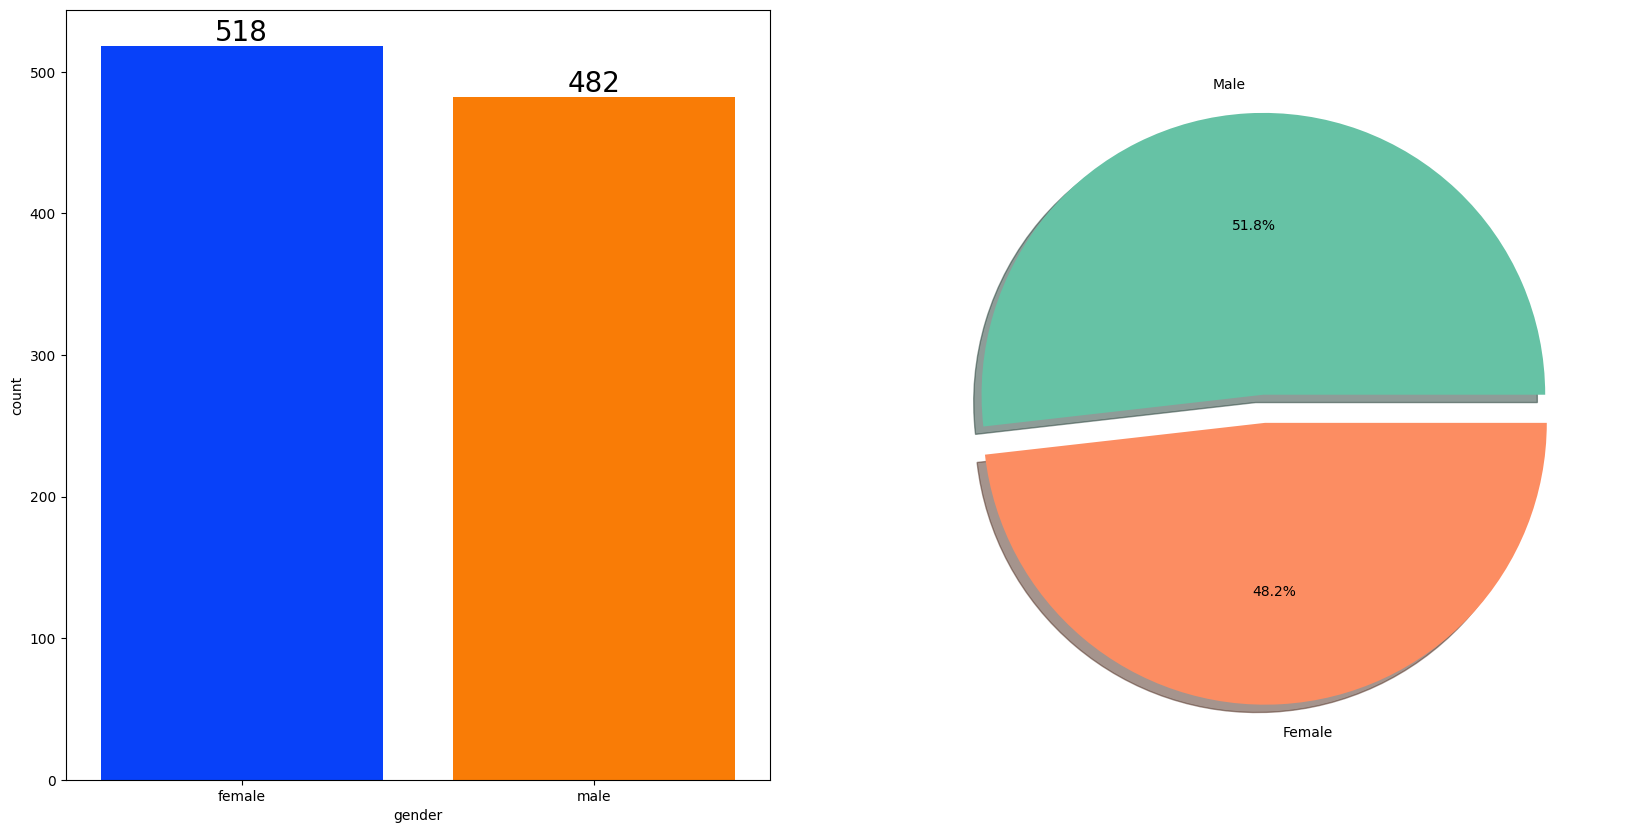

In [67]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x='gender',data=df,palette='bright',saturation=0.95,ax=ax[0])

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=sns.color_palette('Set2'))
plt.show()


In [75]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total Score', 'Average Score'],
      dtype='object')

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

<Figure size 1000x800 with 0 Axes>

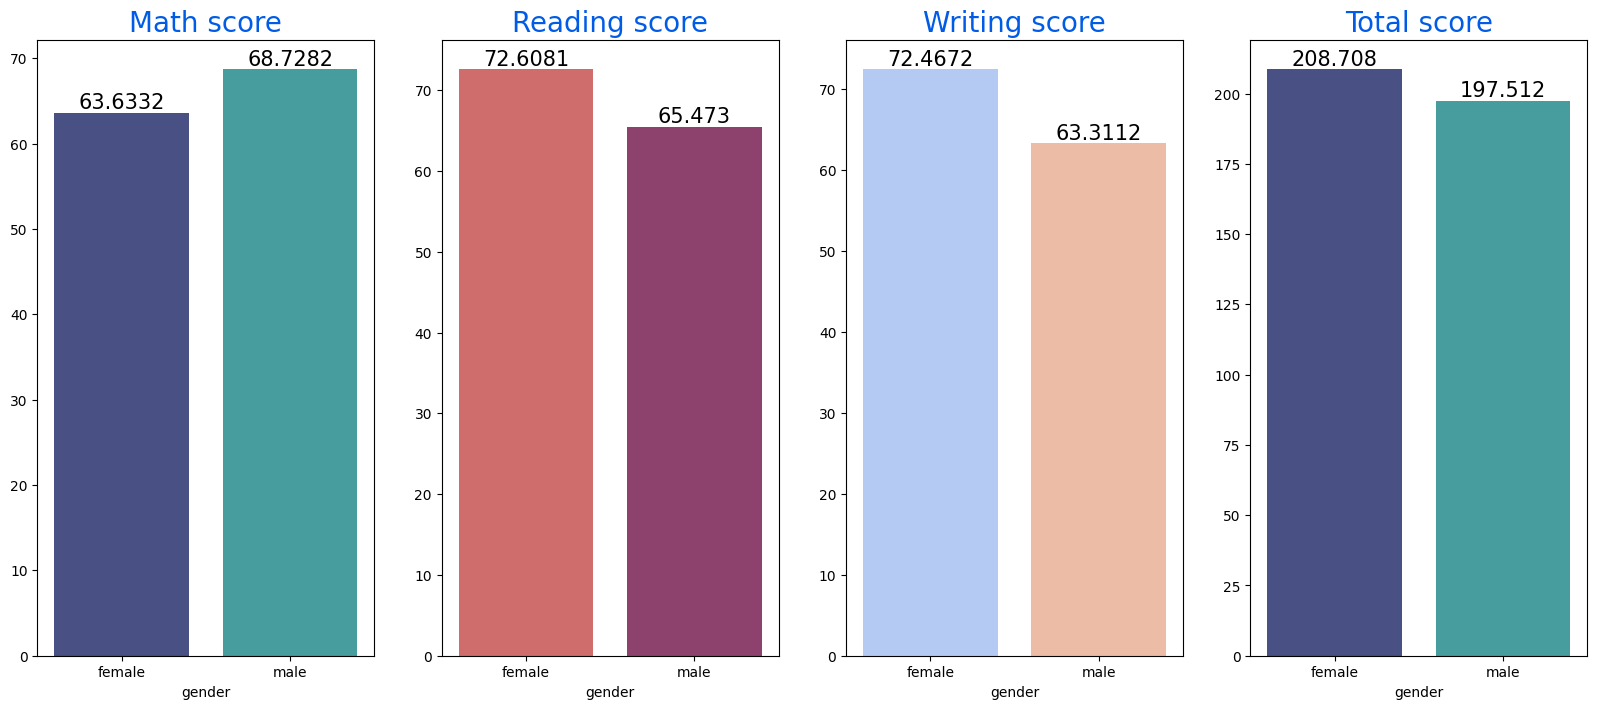

In [96]:
plt.figure(figsize=(10, 8))
grp_data1 = df.groupby('gender') 
f,ax=plt.subplots(1,4,figsize=(20,8))
sns.barplot(x=grp_data1['math_score'].mean().index,y=grp_data1['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=grp_data1['reading_score'].mean().index,y=grp_data1['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=grp_data1['writing_score'].mean().index,y=grp_data1['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)
    
sns.barplot(x=grp_data1['Total Score'].mean().index,y=grp_data1['Total Score'].mean().values,palette = 'mako',ax=ax[3])
ax[3].set_title('Total score',color='#005ce6',size=20)

for container in ax[3].containers:
    ax[3].bar_label(container,color='black',size=15)

In [80]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

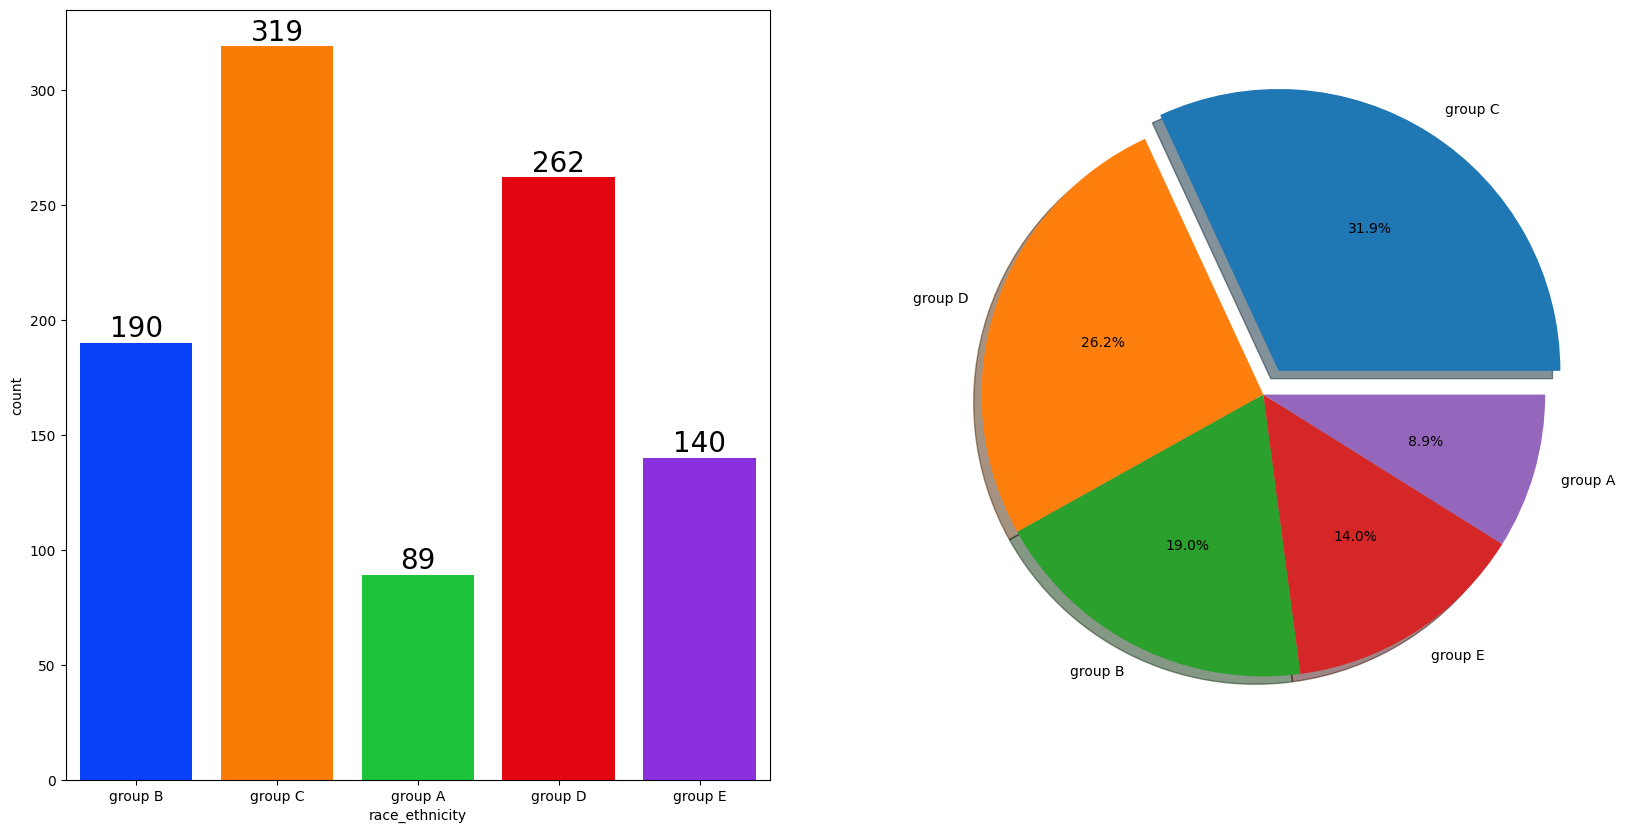

In [92]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

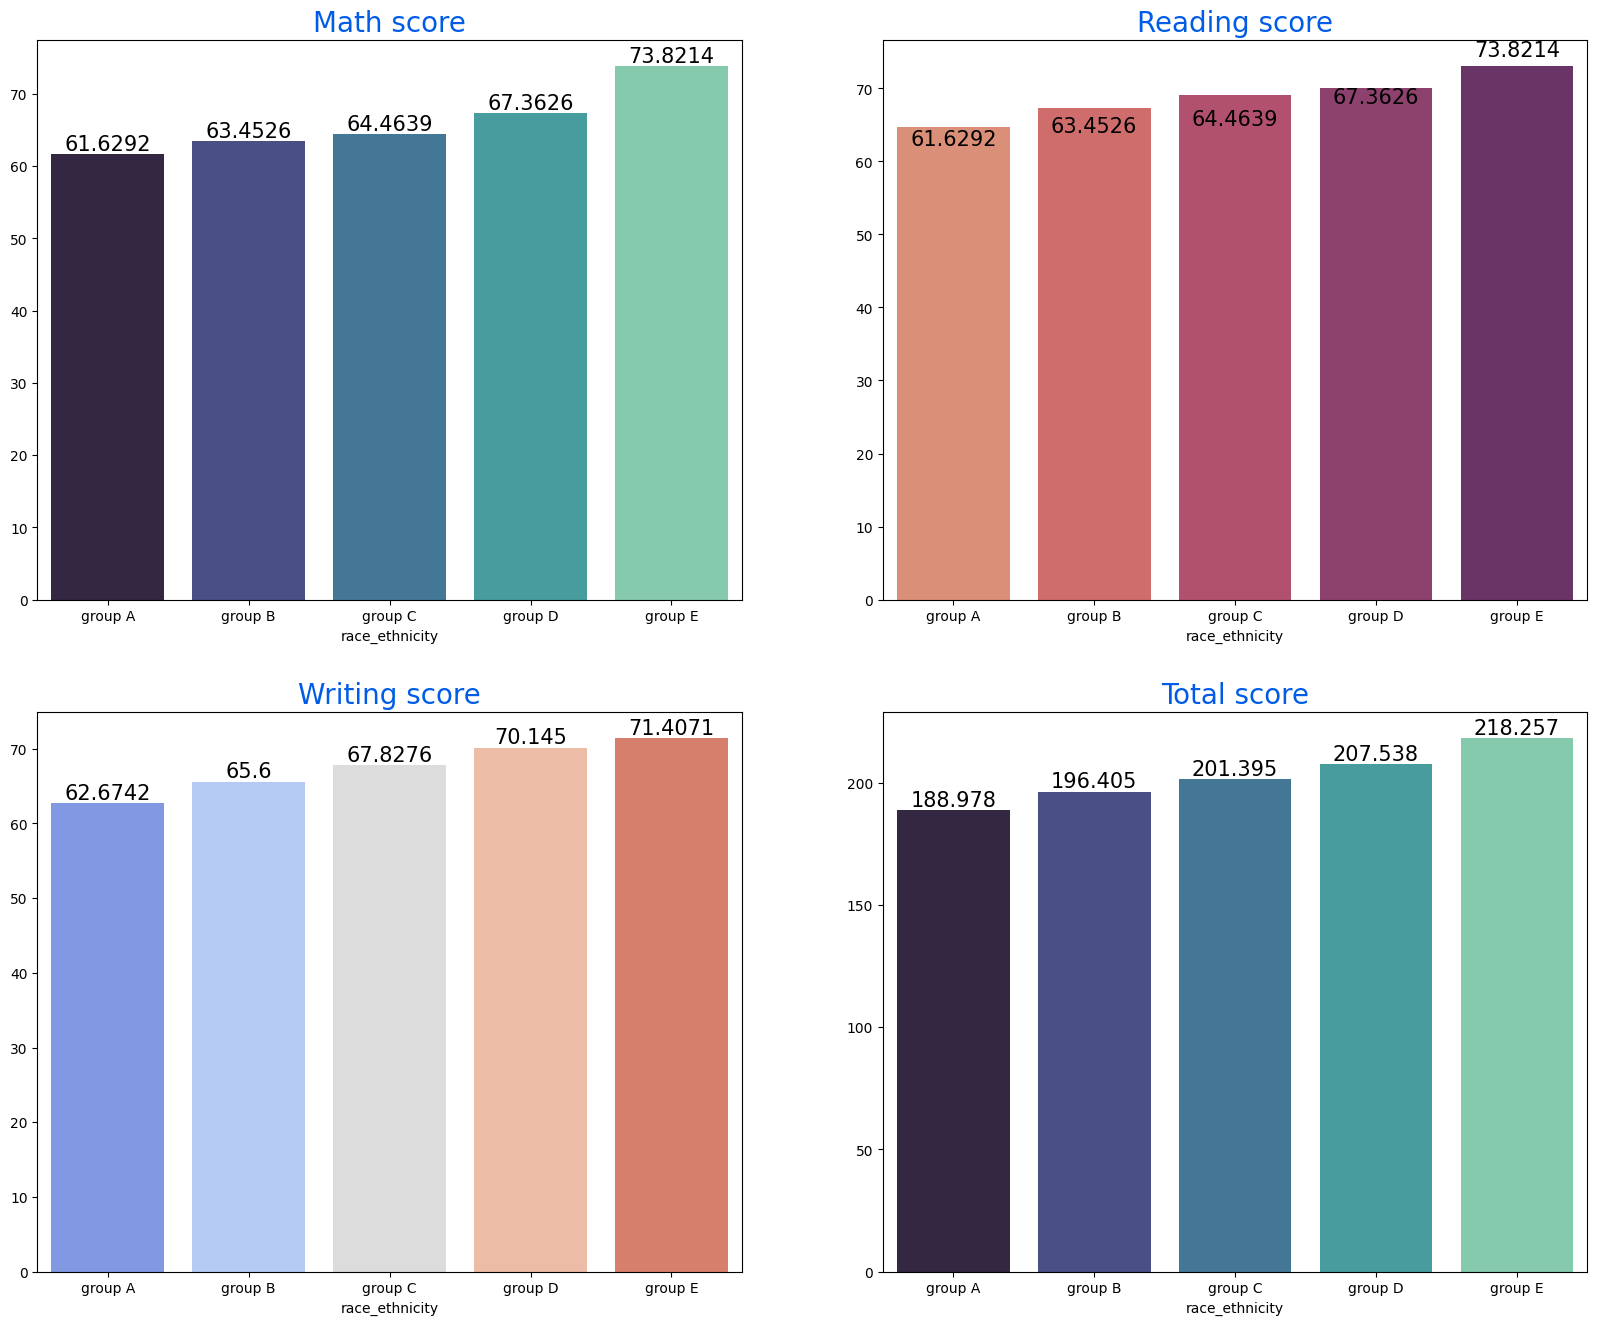

In [99]:
grp_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(2,2,figsize=(20,16))
sns.barplot(x=grp_data2['math_score'].mean().index,y=grp_data2['math_score'].mean().values,palette = 'mako',ax=ax[0, 0])
ax[0, 0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0, 0].containers:
    ax[0, 0].bar_label(container,color='black',size=15)

sns.barplot(x=grp_data2['reading_score'].mean().index,y=grp_data2['reading_score'].mean().values,palette = 'flare',ax=ax[0, 1])
ax[0, 1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[0, 0].containers:
    ax[0, 1].bar_label(container,color='black',size=15)

sns.barplot(x=grp_data2['writing_score'].mean().index,y=grp_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[1, 0])
ax[1, 0].set_title('Writing score',color='#005ce6',size=20)

for container in ax[1, 0].containers:
    ax[1, 0].bar_label(container,color='black',size=15)
    
sns.barplot(x=grp_data2['Total Score'].mean().index,y=grp_data2['Total Score'].mean().values,palette = 'mako',ax=ax[1, 1])
ax[1,1].set_title('Total score',color='#005ce6',size=20)

for container in ax[1, 1].containers:
    ax[1, 1].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

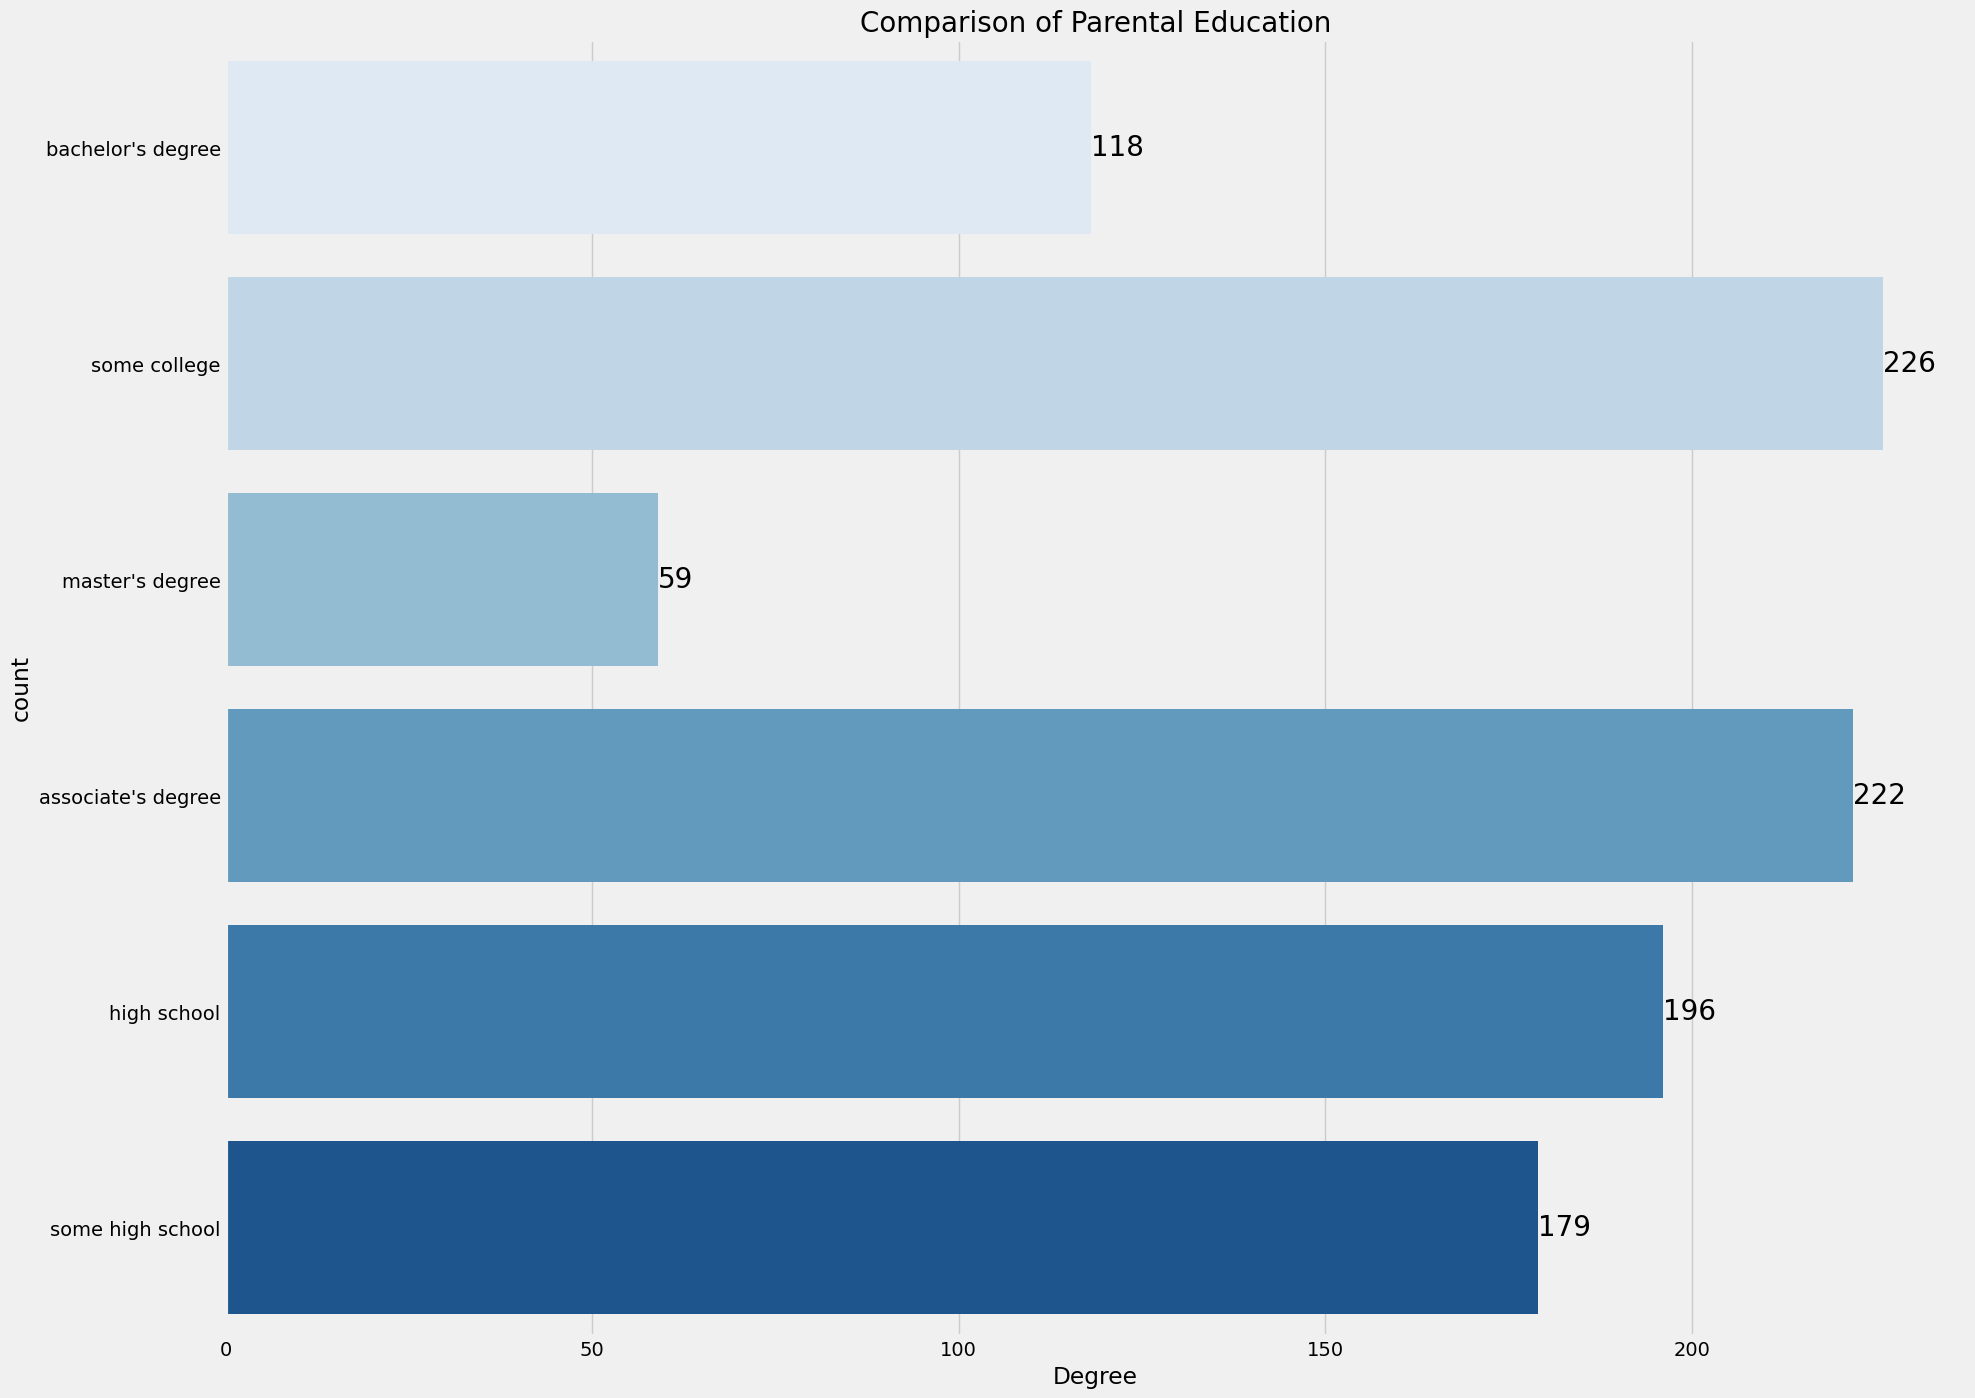

In [105]:
f,ax=plt.subplots(1,1,figsize=(20,16))
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues',ax=ax)
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
for container in ax.containers:
    ax.bar_label(container,color='black',size=20)
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

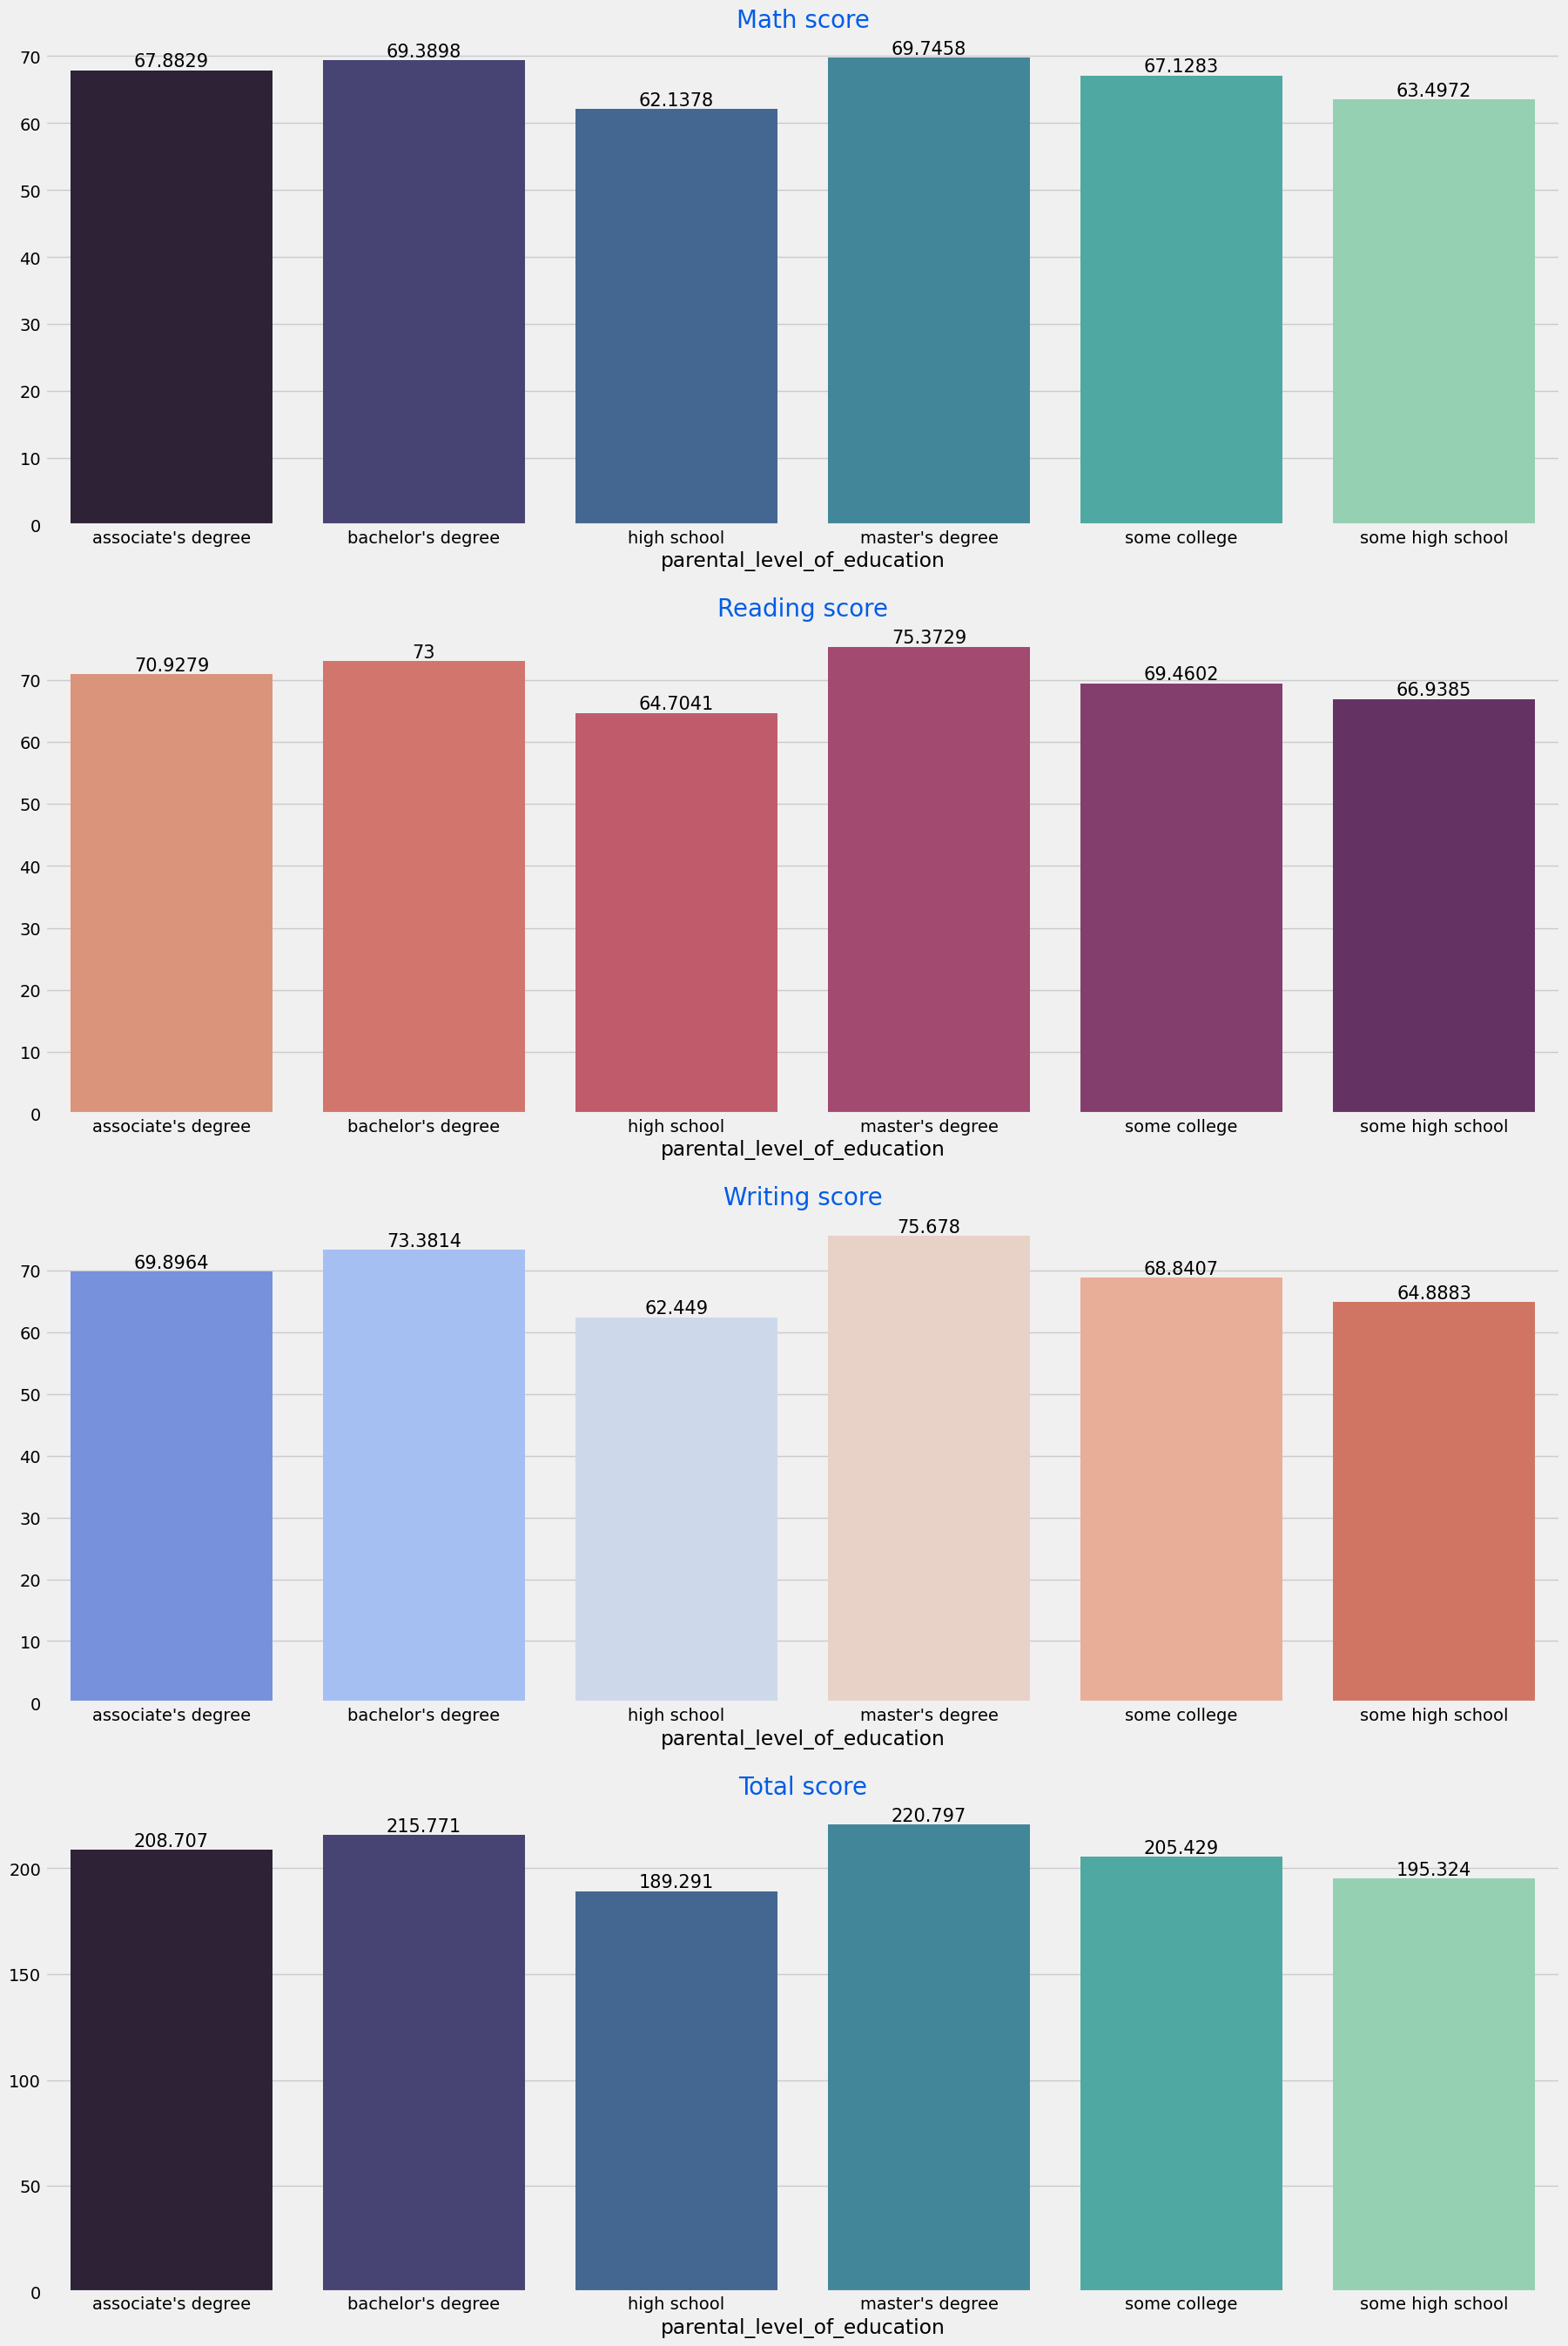

In [112]:
grp_data3=df.groupby('parental_level_of_education')
f,ax=plt.subplots(4,1,figsize=(20,32))
sns.barplot(x=grp_data3['math_score'].mean().index,y=grp_data3['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=grp_data3['reading_score'].mean().index,y=grp_data3['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=grp_data3['writing_score'].mean().index,y=grp_data3['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)
    
sns.barplot(x=grp_data3['Total Score'].mean().index,y=grp_data3['Total Score'].mean().values,palette = 'mako',ax=ax[3])
ax[3].set_title('Total score',color='#005ce6',size=20)

for container in ax[3].containers:
    ax[3].bar_label(container,color='black',size=15)

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

In [113]:
### same cane be done for all.


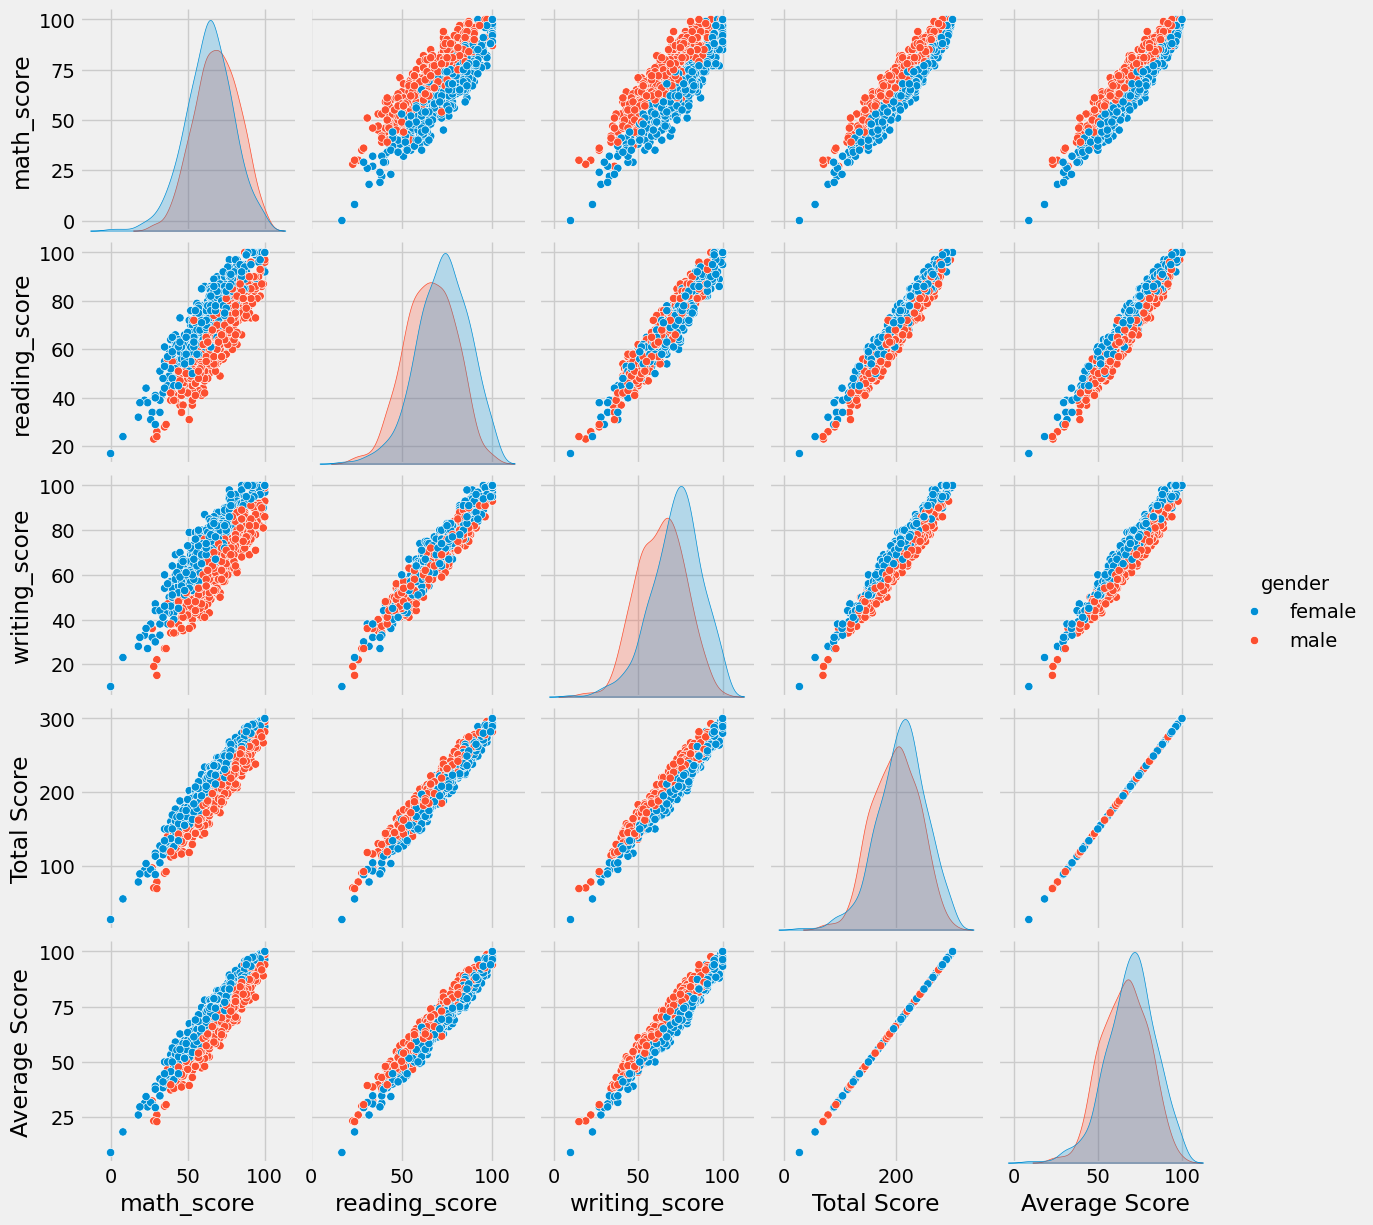

In [114]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.